In [91]:
import pandas as pd
from scipy.stats import mannwhitneyu, kruskal, wilcoxon

In [85]:
# Load the data
DATA_DIR = '../data/server_data/sanitized_data/'

In [86]:
chat_client_info = pd.read_csv(DATA_DIR + 'chat_client_info.tsv', sep='\t')
chat_history = pd.read_csv(DATA_DIR + 'chat_history.tsv', sep='\t')
chat_in_task = pd.read_csv(DATA_DIR + 'chat_in_task.tsv', sep='\t')
chat_post_task = pd.read_csv(DATA_DIR + 'chat_post_task.tsv', sep='\t')
chat_pre_task = pd.read_csv(DATA_DIR + 'chat_pre_task.tsv', sep='\t')

## Compare Post-Task and Pre-Task

In [87]:
chat_pre_task['interaction_total'] = chat_pre_task.interaction_dignity + chat_pre_task.interaction_dignity + chat_pre_task.interaction_respect

chat_post_task['interaction_total'] = chat_post_task.interaction_dignity + chat_post_task.interaction_dignity + chat_post_task.interaction_respect
chat_post_task['support_support'] = chat_post_task.support_understanding + chat_post_task.support_caring + chat_post_task.support_supportive + chat_post_task.support_sensitive
chat_post_task['support_effective'] = chat_post_task.support_effective + chat_post_task.support_helpful + chat_post_task.support_beneficial + chat_post_task.support_adequate


In [99]:
## Join post_task with chat_client_info
chat_post_task_m = chat_post_task.merge(chat_client_info, on=['client_id','pid'], how='left')

## Join pre_task with post_task_m on pid. Common columns for pre_task should have '_pre' suffix and for post_task should have '_post' suffix
chat_post_task_m = chat_post_task_m.merge(chat_pre_task, on='pid', how='left', suffixes=('_post', '_pre'))

## Remove rows with missing values in the columns being compared
chat_post_task_m = chat_post_task_m.dropna(subset=['interaction_total_pre', 'interaction_total_post', 'cognitive_demands_pre', 'cognitive_demands_post', 'cognitive_resources_pre', 'cognitive_resources_post', 'affect_arousal_pre', 'affect_arousal_post', 'affect_valence_pre', 'affect_valence_post'])

In [107]:
## Calculate the difference % between post and pre task
chat_post_task_m['interaction_total_diff'] =  chat_post_task_m['interaction_total_post'] - chat_post_task_m['interaction_total_pre']
chat_post_task_m['cognitive_demands_diff'] =  chat_post_task_m['cognitive_demands_post'] - chat_post_task_m['cognitive_demands_pre']
chat_post_task_m['cognitive_resources_diff'] =  chat_post_task_m['cognitive_resources_post'] - chat_post_task_m['cognitive_resources_pre']
chat_post_task_m['affect_arousal_diff'] =  chat_post_task_m['affect_arousal_post'] - chat_post_task_m['affect_arousal_pre']
chat_post_task_m['affect_valence_diff'] =  chat_post_task_m['affect_valence_post'] - chat_post_task_m['affect_valence_pre']

In [108]:
'''
Create a new df from chat_post_task_m by grouping data by PID
Only 1 row per PID should be present in the new df
Columns should have ['interaction_total_diff', 'cognitive_demands_diff', 'cognitive_resources_diff', 'affect_arousal_diff', 'affect_valence_diff'] for 3 different combinations of `civil` and `emo`
First set of columns should be have suffix `_civil` for client where `civil = 1` and `emo = 0`
Second set of columns should be have suffix `_uncivil` for client where `civil = 0` and `emo = 0`
Third set of columns should be have suffix `_uncivil_emo` for client where `civil = 0` and `emo = 1`
'''

# Create DataFrames for each combination of civil and emo
df_civil = chat_post_task_m[(chat_post_task_m['civil'] == 1) & (chat_post_task_m['emo'] == 0)]
df_uncivil = chat_post_task_m[(chat_post_task_m['civil'] == 0) & (chat_post_task_m['emo'] == 0)]
df_uncivil_emo = chat_post_task_m[(chat_post_task_m['civil'] == 0) & (chat_post_task_m['emo'] == 1)]

# Select and rename columns
columns = ['interaction_total_diff', 'cognitive_demands_diff', 'cognitive_resources_diff', 'affect_arousal_diff', 'affect_valence_diff', 'support_support', 'support_effective']
df_civil = df_civil[['pid'] + columns].rename(columns={col: col + '_civil' for col in columns})
df_uncivil = df_uncivil[['pid'] + columns].rename(columns={col: col + '_uncivil' for col in columns})
df_uncivil_emo = df_uncivil_emo[['pid'] + columns].rename(columns={col: col + '_uncivil_emo' for col in columns})

# Merge DataFrames on PID
df_combined = df_civil.merge(df_uncivil, on='pid', how='outer').merge(df_uncivil_emo, on='pid', how='outer')

In [109]:
print(f"Interaction | Civil: {df_combined['interaction_total_diff_civil'].mean()}, Uncivil: {df_combined['interaction_total_diff_uncivil'].mean()}, Uncivil Emo: {df_combined['interaction_total_diff_uncivil_emo'].mean()}")
print(f"Cognitive Demands | Civil: {df_combined['cognitive_demands_diff_civil'].mean()}, Uncivil: {df_combined['cognitive_demands_diff_uncivil'].mean()}, Uncivil Emo: {df_combined['cognitive_demands_diff_uncivil_emo'].mean()}")
print(f"Cognitive Resources | Civil: {df_combined['cognitive_resources_diff_civil'].mean()}, Uncivil: {df_combined['cognitive_resources_diff_uncivil'].mean()}, Uncivil Emo: {df_combined['cognitive_resources_diff_uncivil_emo'].mean()}")
print(f"Affect Arousal | Civil: {df_combined['affect_arousal_diff_civil'].mean()}, Uncivil: {df_combined['affect_arousal_diff_uncivil'].mean()}, Uncivil Emo: {df_combined['affect_arousal_diff_uncivil_emo'].mean()}")
print(f"Affect Valence | Civil: {df_combined['affect_valence_diff_civil'].mean()}, Uncivil: {df_combined['affect_valence_diff_uncivil'].mean()}, Uncivil Emo: {df_combined['affect_valence_diff_uncivil_emo'].mean()}")

Interaction | Civil: 3.55, Uncivil: -9.15, Uncivil Emo: -8.285714285714286
Cognitive Demands | Civil: -1.3, Uncivil: 0.15, Uncivil Emo: -0.23809523809523808
Cognitive Resources | Civil: 0.8, Uncivil: 0.05, Uncivil Emo: 0.38095238095238093
Affect Arousal | Civil: -0.1, Uncivil: -0.45, Uncivil Emo: -0.3333333333333333
Affect Valence | Civil: 1.15, Uncivil: -1.65, Uncivil Emo: -1.5714285714285714


In [57]:
print(f"Supportiveness | Civil: {df_combined.support_support_civil.mean()}, Uncivil: {df_combined.support_support_uncivil.mean()}, Uncivil Emo: {df_combined.support_support_uncivil_emo.mean()}")
print(f"Effectiveness | Civil: {df_combined.support_effective_civil.mean()}, Uncivil: {df_combined.support_effective_uncivil.mean()}, Uncivil Emo: {df_combined.support_effective_uncivil_emo.mean()}")

Supportiveness | Civil: 5.65, Uncivil: 3.95, Uncivil Emo: 4.333333333333333
Effectiveness | Civil: 6.85, Uncivil: 4.45, Uncivil Emo: 5.0476190476190474


In [81]:
# Define the pairs of columns to test
column_pairs = [
    ('interaction_total_diff_uncivil', 'interaction_total_diff_uncivil_emo'),
    ('cognitive_demands_diff_uncivil', 'cognitive_demands_diff_uncivil_emo'),
    ('cognitive_resources_diff_uncivil', 'cognitive_resources_diff_uncivil_emo'),
    ('affect_arousal_diff_uncivil', 'affect_arousal_diff_uncivil_emo'),
    ('affect_valence_diff_uncivil', 'affect_valence_diff_uncivil_emo'),
    ('support_support_uncivil', 'support_support_uncivil_emo'),
    ('support_effective_uncivil', 'support_effective_uncivil_emo')
]

In [78]:
# Check for missing values in the columns being tested
for col1, col2 in column_pairs:
    print(f"Missing values in {col1}: {df_combined[col1].isnull().sum()}")
    print(f"Missing values in {col2}: {df_combined[col2].isnull().sum()}")

# Ensure that the columns being tested have sufficient data points
for col1, col2 in column_pairs:
    print(f"Number of data points in {col1}: {df_combined[col1].dropna().shape[0]}")
    print(f"Number of data points in {col2}: {df_combined[col2].dropna().shape[0]}")

# Verify that the data types of the columns are numeric
for col1, col2 in column_pairs:
    print(f"Data type of {col1}: {df_combined[col1].dtype}")
    print(f"Data type of {col2}: {df_combined[col2].dtype}")

Missing values in interaction_total_diff_uncivil: 1
Missing values in interaction_total_diff_uncivil_emo: 0
Missing values in cognitive_demands_diff_uncivil: 1
Missing values in cognitive_demands_diff_uncivil_emo: 0
Missing values in cognitive_resources_diff_uncivil: 1
Missing values in cognitive_resources_diff_uncivil_emo: 0
Missing values in affect_arousal_diff_uncivil: 1
Missing values in affect_arousal_diff_uncivil_emo: 0
Missing values in affect_valence_diff_uncivil: 1
Missing values in affect_valence_diff_uncivil_emo: 0
Missing values in support_support_uncivil: 1
Missing values in support_support_uncivil_emo: 0
Missing values in support_effective_uncivil: 1
Missing values in support_effective_uncivil_emo: 0
Number of data points in interaction_total_diff_uncivil: 20
Number of data points in interaction_total_diff_uncivil_emo: 21
Number of data points in cognitive_demands_diff_uncivil: 20
Number of data points in cognitive_demands_diff_uncivil_emo: 21
Number of data points in cog

In [80]:
# Identify the columns to check for missing values
columns_to_check = [
    'interaction_total_diff_uncivil', 'interaction_total_diff_uncivil_emo',
    'cognitive_demands_diff_uncivil', 'cognitive_demands_diff_uncivil_emo',
    'cognitive_resources_diff_uncivil', 'cognitive_resources_diff_uncivil_emo',
    'affect_arousal_diff_uncivil', 'affect_arousal_diff_uncivil_emo',
    'affect_valence_diff_uncivil', 'affect_valence_diff_uncivil_emo',
    'support_support_uncivil', 'support_support_uncivil_emo',
    'support_effective_uncivil', 'support_effective_uncivil_emo'
]

# Remove rows with missing values in the specified columns
df_combined_cleaned = df_combined.dropna(subset=columns_to_check)

In [82]:
# Initialize a list to store the results
results = []

# Perform the Mann-Whitney U test for each pair of columns
for col1, col2 in column_pairs:
    stat, p_value = mannwhitneyu(df_combined_cleaned[col1], df_combined_cleaned[col2])
    results.append({'pair': f'{col1}_vs_{col2}', 'stat': stat, 'p_value': p_value})

# Convert the results to a DataFrame
df_results = pd.DataFrame(results)

# Display the results
print(df_results)

                                                pair   stat   p_value
0  interaction_total_diff_uncivil_vs_interaction_...  180.5  0.606372
1  cognitive_demands_diff_uncivil_vs_cognitive_de...  259.0  0.096656
2  cognitive_resources_diff_uncivil_vs_cognitive_...  171.0  0.416940
3  affect_arousal_diff_uncivil_vs_affect_arousal_...  193.0  0.856026
4  affect_valence_diff_uncivil_vs_affect_valence_...  188.0  0.745204
5  support_support_uncivil_vs_support_support_unc...  184.5  0.682492
6  support_effective_uncivil_vs_support_effective...  180.5  0.600117


### Plotting

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def distribution_plot(data, comparison_columns, custom_labels, palette='Set1'):
    # Create a DataFrame with the required columns
    df_plot = data[comparison_columns]

    # Plot the distribution of the columns
    plt.figure(figsize=(12, 9))
    colors = sns.color_palette(palette, len(comparison_columns))
    for column, label, color in zip(df_plot.columns, custom_labels, colors):
        sns.kdeplot(data=df_plot[column], fill=True, label=label, color=color)

    # plt.title('Distribution of Interaction Total Differences')
    plt.xlabel('Difference from Pre-Task')
    plt.ylabel('Density')
    plt.legend()
    # Save the plot to DATA_DIR/figures
    plt.savefig(DATA_DIR + 'figures/distribution_plot.pdf')
    plt.show()

In [227]:
# distribution_plot(df_combined_cleaned, ['interaction_total_diff_civil', 'interaction_total_diff_uncivil', 'interaction_total_diff_uncivil_emo'])

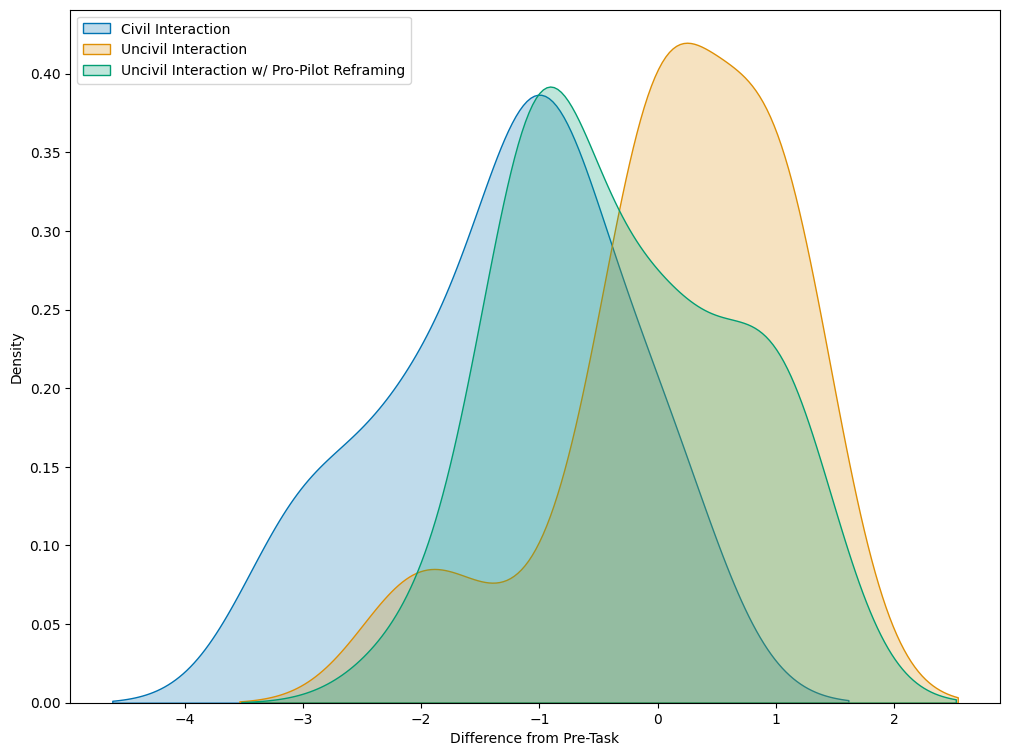

In [228]:
distribution_plot(df_combined_cleaned, ['cognitive_demands_diff_civil', 'cognitive_demands_diff_uncivil', 'cognitive_demands_diff_uncivil_emo'], custom_labels=['Civil Interaction', 'Uncivil Interaction', 'Uncivil Interaction w/ Pro-Pilot Reframing'], palette='colorblind')

In [199]:
# distribution_plot(df_combined_cleaned, ['cognitive_resources_diff_civil', 'cognitive_resources_diff_uncivil', 'cognitive_resources_diff_uncivil_emo'])

In [146]:
# distribution_plot(df_combined_cleaned, ['affect_arousal_diff_civil', 'affect_arousal_diff_uncivil', 'affect_arousal_diff_uncivil_emo'])

In [147]:
# distribution_plot(df_combined_cleaned, ['affect_valence_diff_civil', 'affect_valence_diff_uncivil', 'affect_valence_diff_uncivil_emo'])

In [148]:
# distribution_plot(df_combined_cleaned, ['support_support_civil', 'support_support_uncivil', 'support_support_uncivil_emo'])

In [149]:
# distribution_plot(df_combined_cleaned, ['support_effective_civil', 'support_effective_uncivil', 'support_effective_uncivil_emo'])

## Compare In-Task

In [73]:
columns_keep = ['pid', 'session_id', 'client_id', 'turn_number']
columns_rename = ['user_feedback']
chat_in_task_emo = chat_in_task[chat_in_task.support_type == 'TYPE_EMO_REFRAME']
chat_in_task_info = chat_in_task[chat_in_task.support_type == 'TYPE_INFO_GUIDE']
chat_in_task_senti = chat_in_task[chat_in_task.support_type == 'TYPE_SENTIMENT']

chat_in_task_emo = chat_in_task_emo[columns_keep + columns_rename].rename(columns={col: col + '_emo' for col in columns_rename})
chat_in_task_info = chat_in_task_info[columns_keep + columns_rename].rename(columns={col: col + '_info' for col in columns_rename})
chat_in_task_senti = chat_in_task_senti[columns_keep + columns_rename].rename(columns={col: col + '_senti' for col in columns_rename})

In [74]:
merge_cols = ['client_id','pid','turn_number']
chat_in_task_combined = chat_in_task_emo.merge(chat_in_task_info, on=merge_cols, how='left').merge(chat_in_task_senti, on=merge_cols, how='left')

In [75]:
print(f"Helpfulness | Info: {chat_in_task_combined.user_feedback_info.mean()}, Senti: {chat_in_task_combined.user_feedback_senti.mean()}, Emo: {chat_in_task_combined.user_feedback_emo.mean()}")

Helpfulness | Info: 1.423913043478261, Senti: 0.9565217391304348, Emo: 1.4673913043478262


In [90]:
### Check for missing values in user_feedback columns
print(f"Missing values in user_feedback_info: {chat_in_task_combined.user_feedback_info.isnull().sum()}")
print(f"Missing values in user_feedback_senti: {chat_in_task_combined.user_feedback_senti.isnull().sum()}")
print(f"Missing values in user_feedback_emo: {chat_in_task_combined.user_feedback_emo.isnull().sum()}")

### Remove rows with missing values for user_feedback columns
chat_in_task_combined_cleaned = chat_in_task_combined.dropna(subset=['user_feedback_info', 'user_feedback_senti', 'user_feedback_emo'])

Missing values in user_feedback_info: 12
Missing values in user_feedback_senti: 12
Missing values in user_feedback_emo: 12


In [92]:
### Perform Mann-Whitney U test for user_feedback info and emo
stat, p_value = mannwhitneyu(chat_in_task_combined_cleaned['user_feedback_info'], chat_in_task_combined_cleaned['user_feedback_emo'])
print(f"Mann-Whitney | Info vs Emo: {stat}, {p_value}")

### Perform Wilcoxon signed-rank test for user_feedback info and emo
stat, p_value = wilcoxon(chat_in_task_combined_cleaned['user_feedback_info'], chat_in_task_combined_cleaned['user_feedback_emo'])
print(f"Wilcoxon | Info vs Emo: {stat}, {p_value}")

### Perform Kruskal-Wallis H test for user_feedback info and emo
stat, p_value = kruskal(chat_in_task_combined_cleaned['user_feedback_info'], chat_in_task_combined_cleaned['user_feedback_emo'])
print(f"Kruskal-Wallis | Info vs Emo: {stat}, {p_value}")

Mann-Whitney | Info vs Emo: 4012.5, 0.4807557320436229
Wilcoxon | Info vs Emo: 244.0, 0.6909454955854546
Kruskal-Wallis | Info vs Emo: 0.49942117858484575, 0.4797545617436699


In [93]:
### Perform same tests as above for user_feedback senti and emo
stat, p_value = mannwhitneyu(chat_in_task_combined_cleaned['user_feedback_senti'], chat_in_task_combined_cleaned['user_feedback_emo'])
print(f"Mann-Whitney | Senti vs Emo: {stat}, {p_value}")

stat, p_value = wilcoxon(chat_in_task_combined_cleaned['user_feedback_senti'], chat_in_task_combined_cleaned['user_feedback_emo'])
print(f"Wilcoxon | Senti vs Emo: {stat}, {p_value}")

stat, p_value = kruskal(chat_in_task_combined_cleaned['user_feedback_senti'], chat_in_task_combined_cleaned['user_feedback_emo'])
print(f"Kruskal-Wallis | Senti vs Emo: {stat}, {p_value}")

Mann-Whitney | Senti vs Emo: 3178.0, 0.0012624506351178555
Wilcoxon | Senti vs Emo: 77.0, 5.944986480497342e-05
Kruskal-Wallis | Senti vs Emo: 10.406507495920929, 0.0012557200964876598


In [203]:
### 3-way Kruskal-Wallis H test
stat, p_value = kruskal(chat_in_task_combined_cleaned['user_feedback_info'], chat_in_task_combined_cleaned['user_feedback_senti'], chat_in_task_combined_cleaned['user_feedback_emo'])
print(f"Kruskal-Wallis | Senti vs Emo: {stat}, {p_value}")

Kruskal-Wallis | Senti vs Emo: 12.436374661656165, 0.0019928543308220994


In [204]:
### Plot pair-wise comparisons as a post-hoc analysis
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a DataFrame with the required columns
df_plot = chat_in_task_combined_cleaned[['user_feedback_info', 'user_feedback_senti', 'user_feedback_emo']].melt(var_name='support_type', value_name='user_feedback')

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df_plot['user_feedback'], groups=df_plot['support_type'], alpha=0.05)


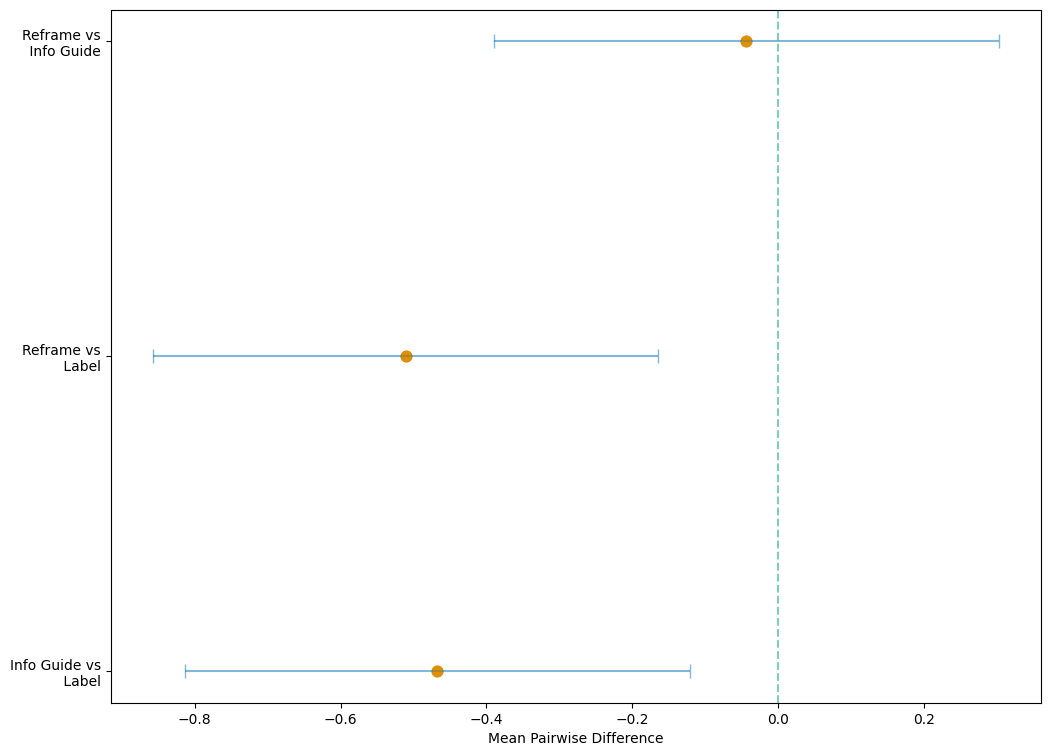

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data from Tukey HSD result
groups = ['Reframe vs\n Info Guide',
          'Reframe vs\n Label',
          'Info Guide vs\n Label']
# Extracting the desired attributes
meandiffs = tukey.meandiffs
lower_bounds = tukey.confint[:, 0]
upper_bounds = tukey.confint[:, 1]
rejects = tukey.reject

# Creating a DataFrame for Seaborn
import pandas as pd
data = pd.DataFrame({
    'Group': groups,
    'Mean Difference': meandiffs,
    'Lower Bound': lower_bounds,
    'Upper Bound': upper_bounds,
    'Reject': rejects
})

# Plotting
plt.figure(figsize=(12, 9))
colors = sns.color_palette('colorblind', 3)

ax = sns.pointplot(x='Mean Difference', y='Group', data=data, linestyle='none', capsize=0.2, err_kws={'linewidth': 4, 'alpha': 0.5}, color=colors[1])
ax.errorbar(data['Mean Difference'], data.index, xerr=[data['Mean Difference'] - data['Lower Bound'], data['Upper Bound'] - data['Mean Difference']], fmt='o', markerfacecolor=colors[1], markeredgecolor=colors[1], ecolor=colors[0], capsize=5, alpha=0.5)
ax.axvline(x=0, color=colors[2], linestyle='--',alpha=0.5)

# Adding labels
ax.set_xlabel('Mean Pairwise Difference')
# Remove the y-axis label
ax.set_ylabel('')

# Save the figure to DATA_DIR/figures as PDF
plt.savefig(DATA_DIR + 'figures/tukey_hsd_plot.pdf')

plt.show()
